In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import glob
import os
import random


In [24]:
print(os.getcwd())  # current working directory

/Users/oakky/Documents/Convey_detection


# แสดงรูปภาพโดยใช้ opencv แบบง่าย

In [61]:
img = cv2.imread("Dataset_person/dataset_merge/images/8e4cb90eaa08a539cda8d8ea57412269_jpg.rf.5cebfdabcef107e9137d339eee23cd62.jpg")
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# แสดงรูปภาพแบบใช้ matplotlib

(-0.5, 959.5, 530.5, -0.5)

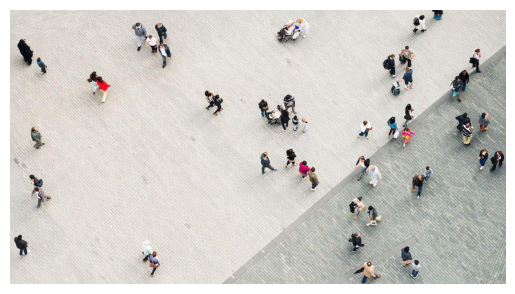

In [60]:
img = plt.imread("Dataset_person/dataset_merge/images/8e4cb90eaa08a539cda8d8ea57412269_jpg.rf.5cebfdabcef107e9137d339eee23cd62.jpg")
plt.imshow(img)
plt.axis('off') 

# แสดงรูปภาพพร้อมกับ label

In [7]:
def load_yolo_labels(label_path, img_width, img_height):
    # อ่าน YOLO label (.txt) แล้วคำนวณพิกัด bounding boxes แบบพิกเซลจริง
    boxes = []
    with open(label_path, 'r') as f:
        for line in f:
            cls, x, y, bw, bh = map(float, line.strip().split())
            x1 = int((x - bw / 2) * img_width)
            y1 = int((y - bh / 2) * img_height)
            x2 = int((x + bw / 2) * img_width)
            y2 = int((y + bh / 2) * img_height)
            boxes.append((int(cls), x1, y1, x2, y2))
    return boxes

def show_image_with_boxes(image_path, boxes, class_names=None):
    # แสดงภาพพร้อมกล่องและชื่อคลาส
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for box in boxes:
        cls_id, x1, y1, x2, y2 = box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        if class_names:
            label = class_names[cls_id]
            cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

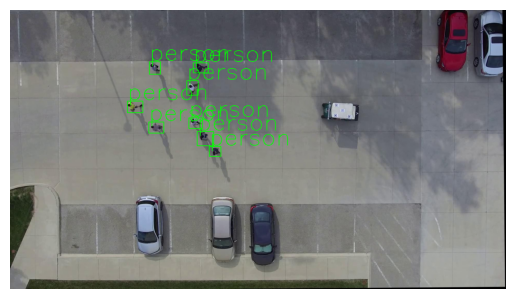

In [8]:
image_path = "Dataset_person/dataset_split/val/images/4217.jpg"
label_path = "Dataset_person/dataset_split/val/labels/4217.txt"
class_names = ["person"]

img = cv2.imread(image_path)
h, w = img.shape[:2]

boxes = load_yolo_labels(label_path, w, h)
show_image_with_boxes(image_path, boxes, class_names)


# การเเสดงรูปภาพร้อมกับlabel แบบเลื่อน index

กำลังแสดงภาพที่ 1 ถึง 5 (ทั้งหมด 5 ภาพ)


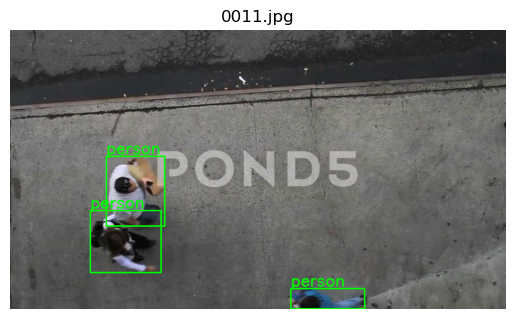

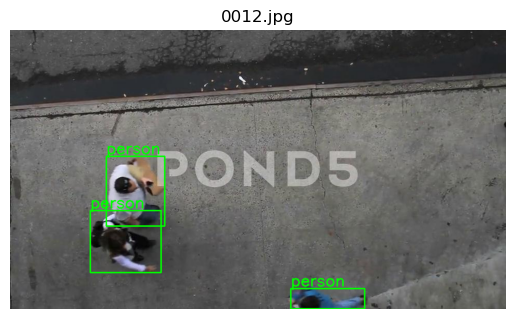

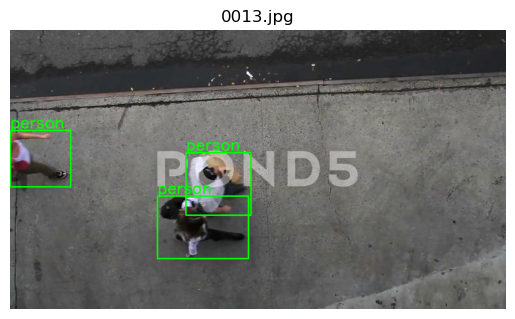

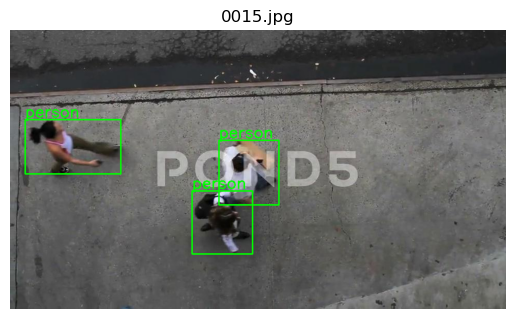

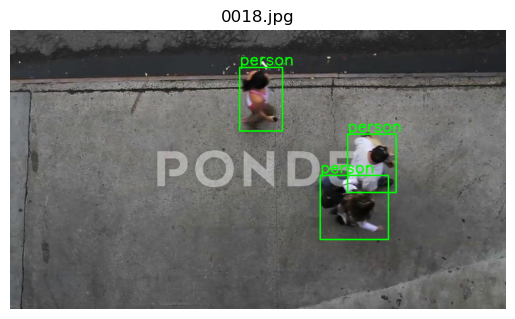

In [9]:
def load_yolo_labels(label_path, img_width, img_height):
    boxes = []
    with open(label_path, 'r') as f:
        for line in f:
            cls, x, y, bw, bh = map(float, line.strip().split())
            x1 = int((x - bw / 2) * img_width)
            y1 = int((y - bh / 2) * img_height)
            x2 = int((x + bw / 2) * img_width)
            y2 = int((y + bh / 2) * img_height)
            boxes.append((int(cls), x1, y1, x2, y2))
    return boxes

def show_image_with_boxes(image_path, boxes, class_names=None):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for box in boxes:
        cls_id, x1, y1, x2, y2 = box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        if class_names:
            label = class_names[cls_id]
            cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    plt.imshow(img)
    plt.title(os.path.basename(image_path))
    plt.axis('off')
    plt.show()

def view_images_with_labels(image_dir, label_dir, class_names, start=0, end=None):
    image_files = sorted(glob.glob(os.path.join(image_dir, "*.jpg")))

    if end is None:
        end = len(image_files)

    image_files = image_files[start:end]

    for image_path in image_files:
        filename = os.path.basename(image_path)
        label_path = os.path.join(label_dir, filename.replace(".jpg", ".txt"))

        img = cv2.imread(image_path)
        if img is None or not os.path.exists(label_path):
            continue

        h, w = img.shape[:2]
        boxes = load_yolo_labels(label_path, w, h)
        show_image_with_boxes(image_path, boxes, class_names)

if __name__ == "__main__":
    image_dir = "Dataset_person/dataset_split/val/images"
    label_dir = "Dataset_person/dataset_split/val/labels"
    class_names = ["person"]

    view_images_with_labels(image_dir, label_dir, class_names, start=1, end=6)


# การอ่านวิดีโอ

In [ ]:
cap = cv2.VideoCapture("video_convey.mp4")
while (cap.isOpened()):
    check, frame = cap.read()
    cv2.imshow("output", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows() 

# ตรวจเช็ค Dataset

In [12]:
#initial path ของ Dataset
image_paths = glob.glob("Dataset_person/dataset_merge/images/*.jpg")
label_paths = glob.glob("Dataset_person/dataset_merge/labels/*.txt")

In [104]:
# หาไฟล์ .txt ในโฟลเดอร์ images
txt_files = glob.glob('Dataset_person/dataset_merge/labels/*.txt')
print(txt_files)

# หาไฟล์ .jpg ในโฟลเดอร์ images
jpg_files = glob.glob('Dataset_person/dataset_merge/images/*.jpg')
print(jpg_files)

['Dataset_person/dataset_merge/labels/cam_3_trimmed_00000128_jpg.rf.11955792c5b1c290215656677f4abf8e.txt', 'Dataset_person/dataset_merge/labels/cam_1_00000157_jpg.rf.3d0df346221a448d3af35272e1749403.txt', 'Dataset_person/dataset_merge/labels/overhead-people-048902763_main_xxlframe82_jpg.rf.2ebd8988826fef2d3d4f04ef93451bbb.txt', 'Dataset_person/dataset_merge/labels/cam_3_2_and_helf_mins_00000126_jpg.rf.ed40fb10546166ce97f2ad915a8bf44f.txt', 'Dataset_person/dataset_merge/labels/image-9-_jpeg_jpg.rf.31a68e41c347d3422870ade1f2f8fef3.txt', 'Dataset_person/dataset_merge/labels/087918214_main_xxlframe52_jpg.rf.1e1057e3aaddad985b07f6ab6d1e84da.txt', 'Dataset_person/dataset_merge/labels/VID20230531122749_mp4-1032_jpg.rf.8be2ac1bb0b477af1af988f26af82bfd.txt', 'Dataset_person/dataset_merge/labels/cam_6_train_00000088_jpg.rf.e20a8be1c4c2adfed3bd08e2300d8dea.txt', 'Dataset_person/dataset_merge/labels/bookstore_video1frame2170_jpg.rf.fb133bad2388e02b2ed0806b237e0700.txt', 'Dataset_person/dataset_mer

In [105]:
#เช็คว่า ภาพเปิดได้มั้ย
open_success = 0
open_fail = 0

for path in image_paths:
    try:
        with Image.open(path) as img:
            open_success += 1
    except Exception as e:
        open_fail += 1
        print(f"เปิดไม่ได้: {path}")

print(f"เปิดได้: {open_success} ภาพ")
print(f"เปิดไม่ได้: {open_fail} ภาพ")


เปิดได้: 4312 ภาพ
เปิดไม่ได้: 0 ภาพ


In [106]:
# เช็ค format labels x y w h normalize
for label_file in label_paths:
    with open(label_file) as f:
        for line in f:
            parts = line.strip().split()
            print(parts)

['0', '0.691015625', '0.33645833333333336', '0.10703125', '0.13333333333333333']
['0', '0.687890625', '0.48333333333333334', '0.0984375', '0.115625']
['0', '0.691015625', '0.33645833333333336', '0.10703125', '0.13333333333333333']
['0', '0.687890625', '0.48333333333333334', '0.0984375', '0.115625']
['0', '0.78671875', '0.29322916666666665', '0.07890625', '0.11354166666666667']
['0', '0.099609375', '0.32760416666666664', '0.14765625', '0.13333333333333333']
['0', '0.083203125', '0.4479166666666667', '0.16171875', '0.1']
['0', '0.350390625', '0.5385416666666667', '0.121875', '0.115625']
['0', '0.387890625', '0.421875', '0.09296875', '0.121875']
['0', '0.24140625', '0.39375', '0.128125', '0.140625']
['0', '0.531640625', '0.7020833333333333', '0.08203125', '0.140625']
['0', '0.486328125', '0.5875', '0.08671875', '0.13020833333333334']
['0', '0.4734375', '0.41041666666666665', '0.0734375', '0.1125']
['0', '0.68984375', '0.17239583333333333', '0.0703125', '0.16354166666666667']
['0', '0.7738

In [13]:
# เช็คดูว่า dataset เรามี labels อะไรบ้าง
class_ids = set()
for label_path in label_paths:
    with open(label_path) as f:
        for line in f:
            class_id = int(line.split()[0]) 
            class_ids.add(class_id)

print("Classes in dataset:", sorted(class_ids))

Classes in dataset: [0]


In [111]:
import os
import glob

def check_image_label_consistency(image_folder, label_folder, image_extension='.jpg', label_extension='.txt'):
    """
    ตรวจสอบความสอดคล้องระหว่างไฟล์ภาพและไฟล์ label
    """
    if not os.path.exists(image_folder):
        print(f"ไม่พบโฟลเดอร์ภาพ: {image_folder}")
        return [], [], 0

    if not os.path.exists(label_folder):
        print(f"ไม่พบโฟลเดอร์ label: {label_folder}")
        return [], [], 0

    # รายชื่อไฟล์ภาพและ label (ตัดนามสกุล)
    image_files = set(os.path.splitext(os.path.basename(f))[0] for f in glob.glob(os.path.join(image_folder, f"*{image_extension}")))
    label_files = set(os.path.splitext(os.path.basename(f))[0] for f in glob.glob(os.path.join(label_folder, f"*{label_extension}")))

    images_without_labels = sorted(list(image_files - label_files))
    labels_without_images = sorted(list(label_files - image_files))
    matched_pairs = image_files & label_files

    return images_without_labels, labels_without_images, len(matched_pairs)

def print_summary(images_without_labels, labels_without_images, matched_count):
    """พิมพ์สรุปผลลัพธ์"""
    print("\n=== สรุปผลการตรวจสอบ ===")

    print(f"\nพบ {len(images_without_labels)} ไฟล์ภาพที่ไม่มี label:")
    for i, img in enumerate(images_without_labels[:20], 1):
        print(f"{i}. {img}")
    if len(images_without_labels) > 20:
        print(f"...และอีก {len(images_without_labels) - 20} ไฟล์")

    print(f"\nพบ {len(labels_without_images)} ไฟล์ label ที่ไม่มีภาพ:")
    for i, lbl in enumerate(labels_without_images[:20], 1):
        print(f"{i}. {lbl}")
    if len(labels_without_images) > 20:
        print(f"...และอีก {len(labels_without_images) - 20} ไฟล์")

    print("\n=== สถิติทั้งหมด ===")
    print(f"จำนวนไฟล์ภาพทั้งหมด: {len(images_without_labels) + matched_count}")
    print(f"จำนวนไฟล์ label ทั้งหมด: {len(labels_without_images) + matched_count}")
    print(f"จำนวนคู่ที่สอดคล้องกัน: {matched_count}")

if __name__ == "__main__":
    image_folder = "Dataset_person/dataset_merge/images"
    label_folder = "Dataset_person/dataset_merge/labels"

    images_without_labels, labels_without_images, matched_count = check_image_label_consistency(
        image_folder, label_folder
    )
    print_summary(images_without_labels, labels_without_images, matched_count)



=== สรุปผลการตรวจสอบ ===

พบ 0 ไฟล์ภาพที่ไม่มี label:

พบ 0 ไฟล์ label ที่ไม่มีภาพ:

=== สถิติทั้งหมด ===
จำนวนไฟล์ภาพทั้งหมด: 4312
จำนวนไฟล์ label ทั้งหมด: 4312
จำนวนคู่ที่สอดคล้องกัน: 4312


In [109]:
# เปลี่ยนชื่อ image เเละ labels ให้มี format เดียวกัน
import shutil

# โฟลเดอร์ของภาพและ label
image_dir = 'Dataset_person/dataset_merge/images'
label_dir = 'Dataset_person/dataset_merge/labels'

# ดึงรายการไฟล์ (เฉพาะที่มีคู่กัน)
image_paths = sorted(glob.glob(os.path.join(image_dir, '*.jpg')))
label_paths = sorted(glob.glob(os.path.join(label_dir, '*.txt')))

# เอา basename มาใช้จับคู่ เช่น 'img001'
image_basenames = {os.path.splitext(os.path.basename(p))[0]: p for p in image_paths}
label_basenames = {os.path.splitext(os.path.basename(p))[0]: p for p in label_paths}

# หาไฟล์ที่มีทั้งภาพและ label
common_basenames = sorted(set(image_basenames.keys()) & set(label_basenames.keys()))

# เริ่มเปลี่ยนชื่อ
for idx, base in enumerate(common_basenames, 1):
    new_name = f"{idx:04d}"  # เช่น 0001, 0002
    old_image_path = image_basenames[base]
    old_label_path = label_basenames[base]

    new_image_path = os.path.join(image_dir, new_name + '.jpg')
    new_label_path = os.path.join(label_dir, new_name + '.txt')

    os.rename(old_image_path, new_image_path)
    os.rename(old_label_path, new_label_path)

    print(f"✅ {base} → {new_name}")


✅ 025912682_main_xxlframe105_jpg.rf.06125a1320dfb79930a00b875c862493 → 0001
✅ 025912682_main_xxlframe105_jpg.rf.792d120dabeebdf5a63267242b071b69 → 0002
✅ 025912682_main_xxlframe10_jpg.rf.f08c225f0a542696c482d27e9e18df87 → 0003
✅ 025912682_main_xxlframe10_jpg.rf.f1e67b863820a2edc6e963684883022d → 0004
✅ 025912682_main_xxlframe127_jpg.rf.2ae5dd1157df7d9a725b0a26512df2bc → 0005
✅ 025912682_main_xxlframe127_jpg.rf.e52c3db2f3303d142bf27e039dd11c3a → 0006
✅ 025912682_main_xxlframe132_jpg.rf.77aee47ef8791be2c7a752ee96c9bd3b → 0007
✅ 025912682_main_xxlframe132_jpg.rf.f78b5374ccdd3964dec1c453a4b1e2d8 → 0008
✅ 025912682_main_xxlframe141_jpg.rf.4fe05369583f227ccbedf06780bdee4b → 0009
✅ 025912682_main_xxlframe141_jpg.rf.60d1d39d0a9433ece141e7882fa0e796 → 0010
✅ 025912682_main_xxlframe218_jpg.rf.0ac43da13dcaf26088e3c1ad75518617 → 0011
✅ 025912682_main_xxlframe218_jpg.rf.f718dcb346c2998d2e3922895ce8f552 → 0012
✅ 025912682_main_xxlframe240_jpg.rf.da25c494bebeb1a059bd5172f3703830 → 0013
✅ 025912682_ma

In [112]:
# แบ่งข้อมูลสำหรับ train val
def split_train_val_no_overlap(source_folder, output_folder, val_ratio=0.2):
    """
    แบ่งข้อมูลเป็น train และ validation sets โดยไม่มีรูปภาพซ้ำกัน
    
    :param source_folder: โฟลเดอร์ต้นทางที่มีโฟลเดอร์ย่อย 'images' และ 'labels'
    :param output_folder: โฟลเดอร์ปลายทางสำหรับเก็บ train และ val sets
    :param val_ratio: สัดส่วนของ validation set (default: 0.2)
    """
    # สร้างโฟลเดอร์ปลายทาง
    train_images_folder = os.path.join(output_folder, "train", "images")
    train_labels_folder = os.path.join(output_folder, "train", "labels")
    val_images_folder = os.path.join(output_folder, "val", "images")
    val_labels_folder = os.path.join(output_folder, "val", "labels")
    
    os.makedirs(train_images_folder, exist_ok=True)
    os.makedirs(train_labels_folder, exist_ok=True)
    os.makedirs(val_images_folder, exist_ok=True)
    os.makedirs(val_labels_folder, exist_ok=True)

    # รวบรวมรายชื่อไฟล์ภาพและ label ที่ตรงกัน
    image_files = [f for f in os.listdir(os.path.join(source_folder, "images")) 
                   if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    
    valid_pairs = []
    for img_file in image_files:
        base_name = os.path.splitext(img_file)[0]
        label_file = base_name + ".txt"
        if os.path.exists(os.path.join(source_folder, "labels", label_file)):
            valid_pairs.append((img_file, label_file))

    # สุ่มลำดับของคู่ไฟล์
    random.shuffle(valid_pairs)

    # แบ่งข้อมูล
    split_index = int(len(valid_pairs) * val_ratio)
    val_pairs = valid_pairs[:split_index]
    train_pairs = valid_pairs[split_index:]

    # คัดลอกไฟล์ไปยังโฟลเดอร์ปลายทาง
    def copy_files(pairs, img_dest, label_dest):
        for img_file, label_file in pairs:
            shutil.copy(os.path.join(source_folder, "images", img_file), os.path.join(img_dest, img_file))
            shutil.copy(os.path.join(source_folder, "labels", label_file), os.path.join(label_dest, label_file))

    copy_files(train_pairs, train_images_folder, train_labels_folder)
    copy_files(val_pairs, val_images_folder, val_labels_folder)

    print(f"การแบ่งข้อมูลเสร็จสิ้น:")
    print(f"จำนวนภาพทั้งหมด: {len(valid_pairs)}")
    print(f"จำนวนภาพใน training set: {len(train_pairs)}")
    print(f"จำนวนภาพใน validation set: {len(val_pairs)}")

# ตัวอย่างการใช้งาน
split_train_val_no_overlap('Dataset_person/dataset_merge', 'Dataset_person/dataset_merge/dataset_split', val_ratio=0.2)

การแบ่งข้อมูลเสร็จสิ้น:
จำนวนภาพทั้งหมด: 4312
จำนวนภาพใน training set: 3450
จำนวนภาพใน validation set: 862
